In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression

In [20]:
data = pd.read_csv('DATA.csv') # importing our data

df = pd.DataFrame(data, columns=['MPG', 'Model Year']) # turning data into pandas dataframe

We make our Model Year as the x-axis because it has a natural ordering, therefore making it ideal for the x-axis

In [21]:
x = df['Model Year'] # Defining x and y axes
y = df['MPG']

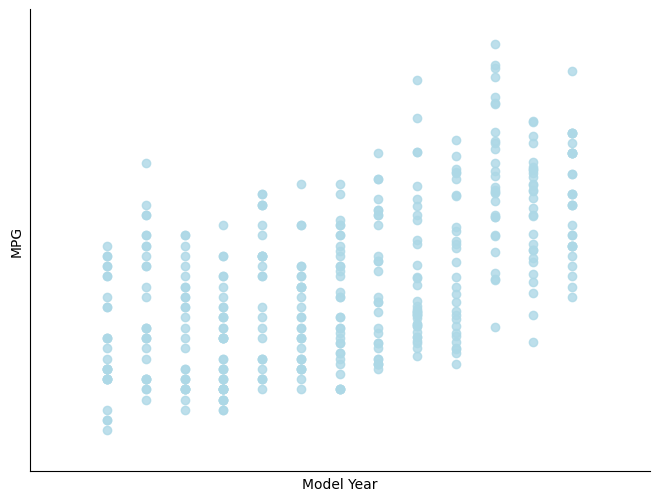

In [22]:

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.scatter(x,y,c='lightblue',alpha=.8) # creates our plot with x and y as our axes and defines our color

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines (the top and right border of our graph)
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(5,50)

ax=plt.gca() # Gets current axes
ax.set_xlabel('Model Year') # Gives our axes a label
ax.set_ylabel('MPG')

plt.show()

We are now going to implement a Simple Linear Regression because we are predicting a relationship between two variables, therefore being the most appropriate

In [23]:
lm = LinearRegression() # creating object

fittedX = x.values.reshape(-1,1) # Reshaping so we can put in our fit function
fittedY = y.values

lm.fit(fittedX,fittedY) # fit our data

newx = [[70]] # import our x for prediction, 2D array required

predicted_y = lm.predict(newx) # makes a prediction

print(predicted_y) 


[16.15559304]


Analysis for our prediction (Not sure if needed)

In [24]:
score = lm.score(fittedX,fittedY) # check our R-score 
print(score)

0.33555041147055686


We have a large R score, must make our mode more accurate

We will investigate why this is the case first by checking for outliers

In [32]:
Q1 = y.quantile(0.25) # Calculate our quartiles
Q3 = y.quantile(0.75)

IQR = Q3 - Q1 # Get our IQR

upper = Q3 + (1.5 * IQR) # Find our lower and upper outlier bounds
lower = Q1 - (1.5 * IQR)

outliers = df[(y < lower) | (y > upper)] # search for outliers
print(outliers)

      MPG  Model Year
322  46.6          80


We have only one relatively small outlier in our dataset which shouldn't be responsible for our innacuracy 